When the experimental spectrum is noisy, a manual peak selection is required.
This examples show how this can be done.

In [16]:
import os

import matplotlib.pyplot as py
import numpy as np

from irsa.core.utils import load_spectrum, normalize_spectrum, load_peaks
from irsa.core.spectrum_functions import deconvolute, voigt, voigt_fn
from irsa.core.algorithm import Algorithm
from irsa.core.analyses import get_spearman_and_pearson


Load experimental Spectrum

In [6]:
path_to_experimental_dir = f"{os.path.abspath('')}/data/experimental_spectra/"
experimental_ir_spectrum = normalize_spectrum(load_spectrum(f"{path_to_experimental_dir}/ir_cdcl3.txt"), lower=1000, upper=1500)
experimental_raman_spectrum = normalize_spectrum(load_spectrum(f"{path_to_experimental_dir}/raman_cdcl3.txt"), lower=1000, upper=1500)

Load spectrum from isomer_0

In [7]:
path_to_theoretical_dir = f"{os.path.abspath('')}/data/theoretical_spectra/"
theoretical_ir_spectrum = normalize_spectrum(load_spectrum(f"{path_to_theoretical_dir}/isomer_0/ir_spectrum"), lower=1000, upper=1800)
theoretical_raman_spectrum = normalize_spectrum(load_spectrum(f"{path_to_theoretical_dir}/isomer_0/raman_spectrum"), lower=1000, upper=1800)

Load manual selected Peaks

In [8]:
manual_selected_ir_peaks = np.loadtxt(f"{os.path.abspath('')}/ir_exp_manual_selected.txt", usecols=(0,), dtype=np.float64)
manual_selected_raman_peaks = np.loadtxt(f"{os.path.abspath('')}/raman_exp_manual_selected.txt", usecols=(0,), dtype=np.float64)

Perform deconvolution of experimental and theoretical spectra, save it to file

In [9]:
deconvolute(spectrum=theoretical_ir_spectrum, working_dir=os.path.abspath(''), save_data='ir_theo_peaks.txt', normalize=True, lower=1000, higher=1800, vcd=False)
deconvolute(spectrum=theoretical_raman_spectrum, working_dir=os.path.abspath(''), save_data='raman_theo_peaks.txt', normalize=True, lower=1000, higher=1800, vcd=False)
deconvolute(peaks_on_x_axis=manual_selected_ir_peaks, spectrum=experimental_ir_spectrum, working_dir=os.path.abspath(''), save_data='ir_exp_peaks.txt', normalize=True, lower=1000, higher=1500, vcd=False)
deconvolute(peaks_on_x_axis=manual_selected_raman_peaks, spectrum=experimental_raman_spectrum, working_dir=os.path.abspath(''), save_data='raman_exp_peaks.txt', normalize=True, lower=1000, higher=1500, vcd=False)

Load IR peaks

In [10]:
exp_peaks = load_peaks(paths=[f"{os.path.abspath('')}/ir_exp_peaks.txt"], kind_of_spectra=[0]) # first IR (0), second Raman (1), vcd would be (2)
theo_peaks = load_peaks(paths=[f"{os.path.abspath('')}/ir_theo_peaks.txt"], kind_of_spectra=[0])

Show deconvolution of experimental spectrum

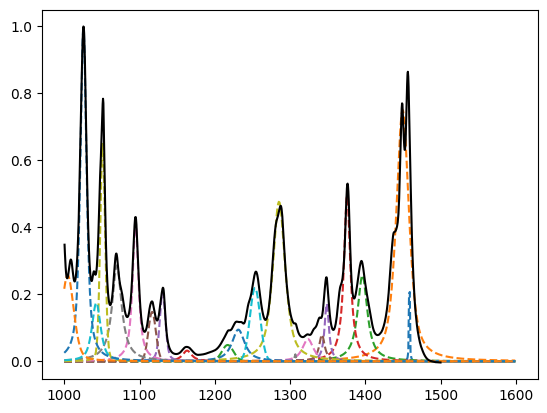

In [33]:
x_axis = np.arange(1000, 1600)
for peak in exp_peaks:
    one_peak_spectrum_y = voigt_fn(x_axis, amp=peak[0], cen=peak[1], wid=peak[2], eta=peak[4])
    py.plot(x_axis, one_peak_spectrum_y, "--")
py.plot(experimental_ir_spectrum[:, 0], experimental_ir_spectrum[:, 1], color="black", label="experimental")
py.legend()
py.show()

Show theoretical spectrum deconvolution

AttributeError: 'int' object has no attribute 'items'

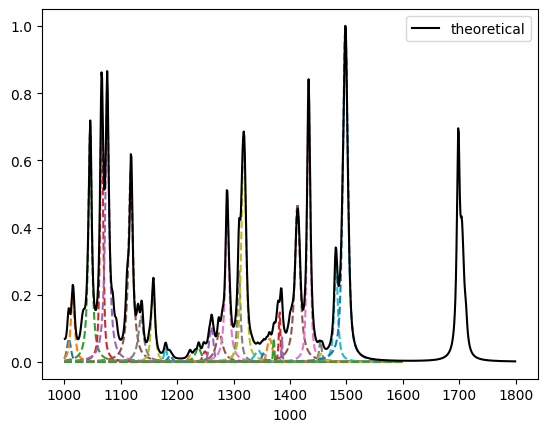

In [35]:
x_axis = np.arange(1000, 1600)
for peak in theo_peaks:
    one_peak_spectrum_y = voigt_fn(x_axis, amp=peak[0], cen=peak[1], wid=peak[2], eta=peak[4])
    py.plot(x_axis, one_peak_spectrum_y, "--")
py.plot(theoretical_ir_spectrum[:, 0], theoretical_ir_spectrum[:, 1], color="black", label="theoretical")
py.legend()
py.xlim(1000, 1600)
py.show()